## Preprocessing Section


In this notebook, it will be performed the exploration part of the dataset which will be a premise to the dataset preprocessing.


### Steps:

1. Data import
2. Data features exploration
    - label distribution
    - distribution
    - correlation
3. feature compression / selection
4. null values imputation



In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 100)

### Data Import


In [122]:
df = pd.read_csv('../dataset/dataset.csv', sep=';')
print('Dataset shape:', df.shape)
df.head() 

Dataset shape: (99976, 43)


,uuid,default,account_amount_added_12_24m,account_days_in_dc_12_24m,account_days_in_rem_12_24m,account_days_in_term_12_24m,account_incoming_debt_vs_paid_0_24m,account_status,account_worst_status_0_3m,account_worst_status_12_24m,account_worst_status_3_6m,account_worst_status_6_12m,age,avg_payment_span_0_12m,avg_payment_span_0_3m,merchant_category,merchant_group,has_paid,max_paid_inv_0_12m,max_paid_inv_0_24m,name_in_email,num_active_div_by_paid_inv_0_12m,num_active_inv,num_arch_dc_0_12m,num_arch_dc_12_24m,num_arch_ok_0_12m,num_arch_ok_12_24m,num_arch_rem_0_12m,num_arch_written_off_0_12m,num_arch_written_off_12_24m,num_unpaid_bills,status_last_archived_0_24m,status_2nd_last_archived_0_24m,status_3rd_last_archived_0_24m,status_max_archived_0_6_months,status_max_archived_0_12_months,status_max_archived_0_24_months,recovery_debt,sum_capital_paid_account_0_12m,sum_capital_paid_account_12_24m,sum_paid_inv_0_12m,time_hours,worst_status_active_inv
0,63f69b2c-8b1c-4740-b78d-52ed9a4515ac,0.0,0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0,NaN,20,12.692308,8.333333,Dietary supplements,Health & Beauty,True,31638.0,31638.0,no_match,0.153846,2,0,0,13,14,0,0.0,0.0,2,1,1,1,1,1,1,0,0,0,178839,9.653333,1.0
1,0e961183-8c15-4470-9a5e-07a1bd207661,0.0,0,0.0,0.0,0.0,NaN,1.0,1.0,1.0,1.0,1.0,50,25.833333,25.000000,Books & Magazines,Entertainment,True,13749.0,13749.0,F+L,0.000000,0,0,0,9,19,3,0.0,0.0,0,1,1,1,1,2,2,0,0,0,49014,13.181389,NaN
2,d8edaae6-4368-44e0-941e-8328f203e64e,0.0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,22,20.000000,18.000000,Diversified entertainment,Entertainment,True,29890.0,29890.0,L1+F,0.071429,1,0,0,11,0,3,0.0,0.0,1,1,1,1,1,2,2,0,0,0,124839,11.561944,1.0
3,0095dfb6-a886-4e2a-b056-15ef45fdb0ef,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,4.687500,4.888889,Diversified entertainment,Entertainment,True,40040.0,40040.0,F1+L,0.031250,1,0,0,31,21,0,0.0,0.0,1,1,1,1,1,1,1,0,0,0,324676,15.751111,1.0
4,c8f8b835-5647-4506-bf15-49105d8af30b,0.0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,25,13.000000,13.000000,Electronic equipment & Related accessories,Electronics,True,7100.0,7100.0,F+L,0.000000,0,0,0,1,0,0,0.0,0.0,0,1,0,0,1,1,1,0,0,0,7100,12.698611,NaN


In [123]:
print('Num of duplicates:', df.duplicated().sum())

Num of duplicates: 0


### Data Features Exploration



We observe that the label distribution is extremely unbalanced (98.5 negative, 1.5 positive values).
This should be taken into account when finding the metric to be optimized

In [124]:
# Label Distribution

(100 * df[~df.default.isnull()].default.value_counts()) / df_train.shape[0]

0.0    98.568507
1.0     1.431493
Name: default, dtype: float64

In [125]:
# Features exploration & Distribution plots - all dataset

We distinguish between categorical variables from the numerical variables reading their meaning in the paper

In [126]:
cat_columns = ['account_status', 'account_worst_status_0_3m', 'account_worst_status_12_24m', 'account_worst_status_3_6m', 'account_worst_status_6_12m', 'merchant_category', 'merchant_group', 'name_in_email', 'status_last_archived_0_24m', 'status_2nd_last_archived_0_24m', 'status_3rd_last_archived_0_24m', 'status_max_archived_0_6_months', 'status_max_archived_0_12_months', 'status_max_archived_0_24_months', 'worst_status_active_inv']
cols_to_drop = ['default', 'uuid']
num_columns = list(set(df.columns) - set(cols_to_drop + cat_columns))

In [127]:
df_num = df[num_columns]
df_cat = df[cat_columns]

In [128]:
import seaborn as sns

sns.set(style='darkgrid', palette="deep", font_scale=1.1)

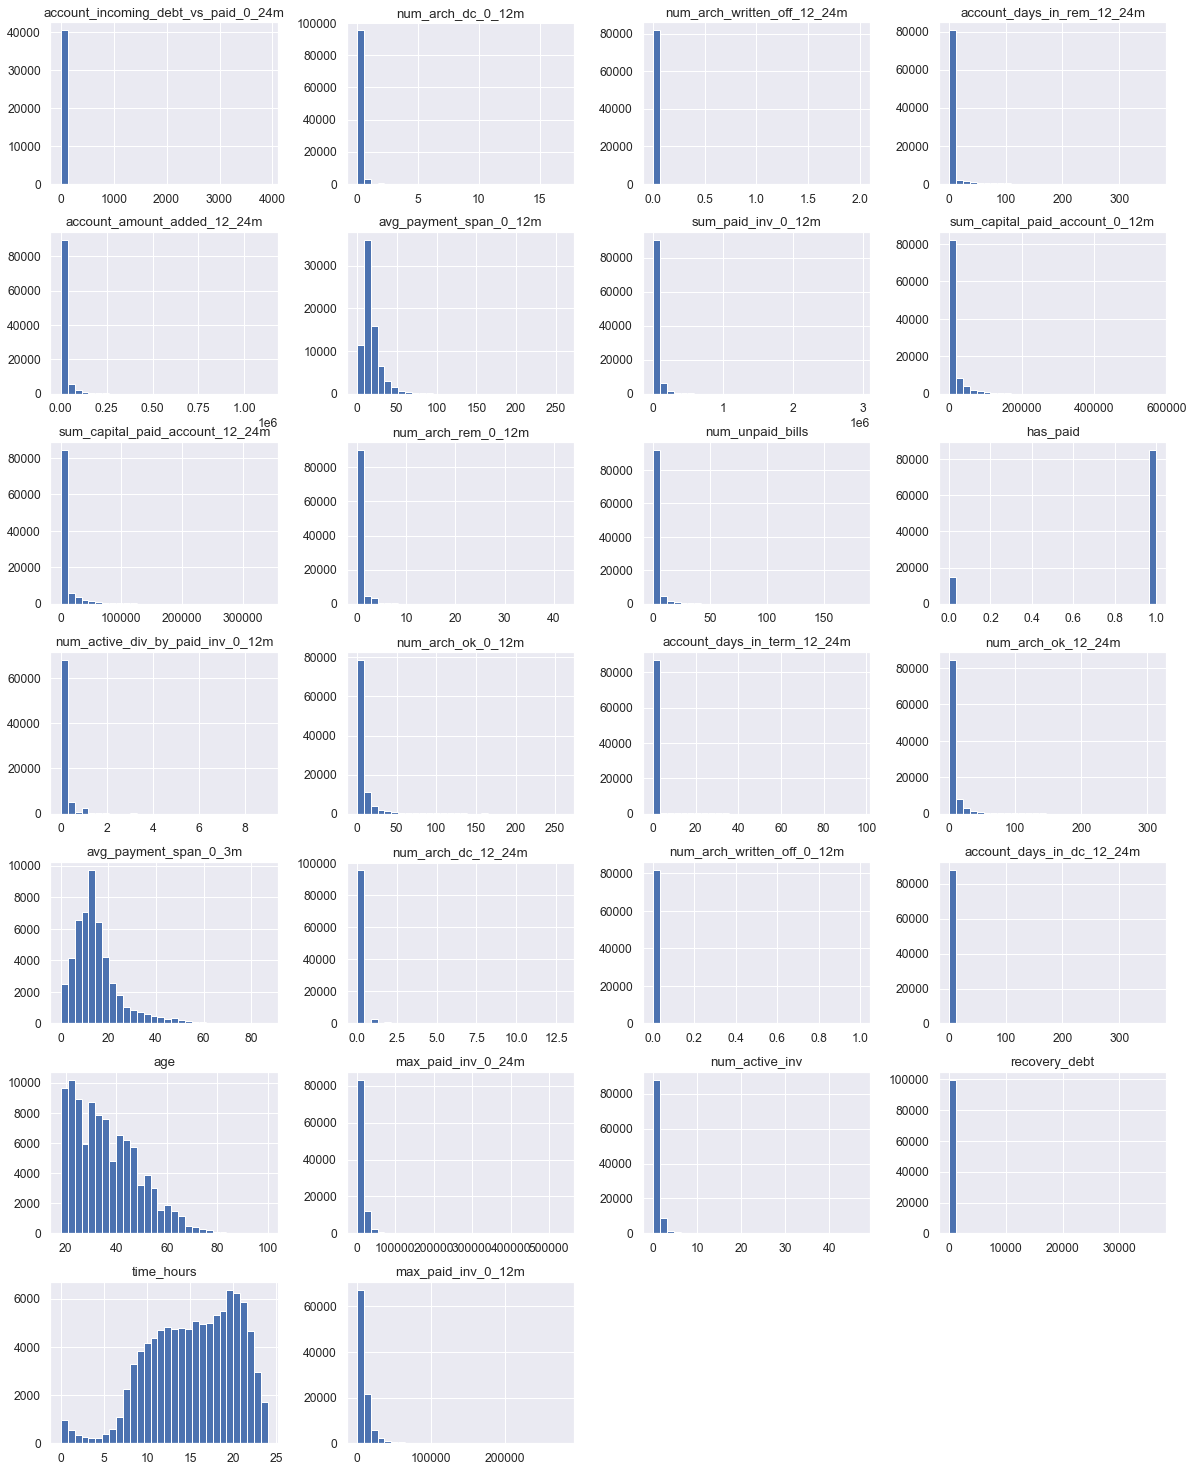

In [129]:
df[num_columns].astype(float).hist(bins=30, figsize=(20, 30), layout=(8, 4));
# plot all distribution of numeric / boolean values

Categorical Variables

/Users/danielemontesi/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/danielemontesi/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/danielemontesi/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretatio

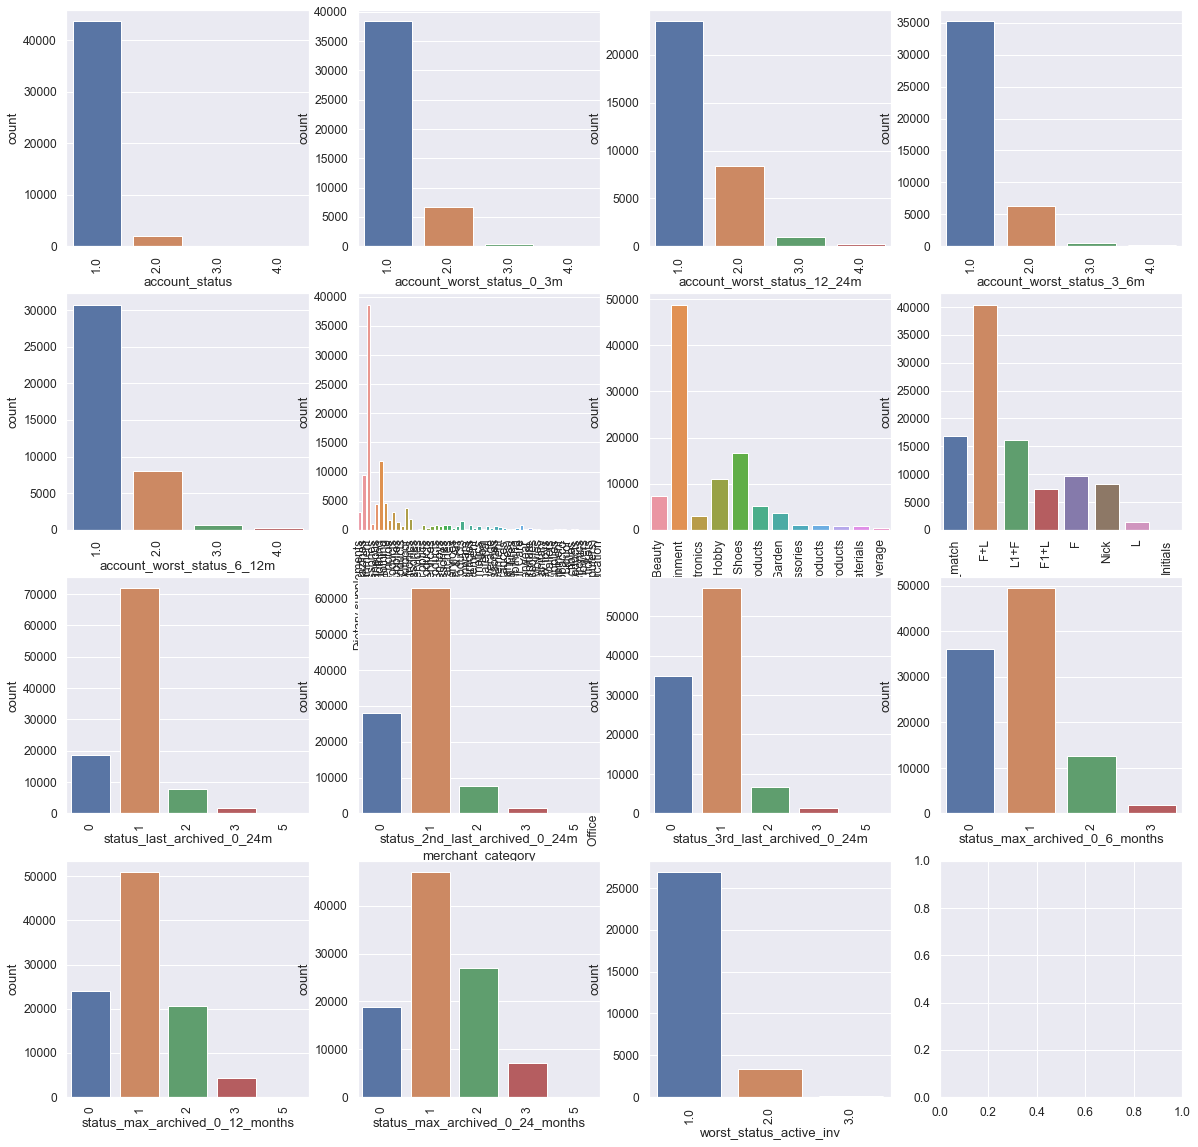

In [130]:
fig, ax = plt.subplots(4, 4, figsize=(20, 20))
for variable, subplot in zip(cat_columns, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

There are only few categories in all variables, except for the `Merchant Category` field. Let's analize it more in depth:

In [131]:
((100*df.merchant_category.value_counts()) / df.merchant_category.shape[0])

,index,merchant_category
0,Diversified entertainment,38.623270
1,Youthful Shoes & Clothing,11.757822
2,Books & Magazines,9.365248
3,General Shoes & Clothing,4.598104
4,Concept stores & Miscellaneous,4.407058
5,Sports gear & Outdoor,3.712891
6,Dietary supplements,3.101744
7,Diversified children products,2.994719
8,Diversified electronics,1.844443
9,Prints & Photos,1.675402


We notice that around **40** over 55 categories have at least 0.1% of the frequency. As we will use a Machine Model able to handle categorical values, we will take this into account in the hyperparameter setting.

### Null Values Imputation


There are many columns with a relatively large number of missing values.

The columns name seems to be referring to historical values of the user, which might not be available in case the users are newer than the period in scope (e.g. User registered 2m ago, columns refers to values between 12 and 24m prior), hence in that case the value should be treated differently. 

In [132]:
# summarize the number of rows with missing values for each column
columns_with_nans = []
for i in range(df.shape[1]):
    col = df.columns[i]
    # count number of rows with missing values
    n_miss = df[col].isnull().sum()
    perc = n_miss / df.shape[0] * 100
    if perc > 0 and col != 'default':
        columns_with_nans.append(col)
        print('> %s, \t Missing: %d (%.1f%%)' % (col, n_miss, perc))

> account_days_in_dc_12_24m, 	 Missing: 11836 (11.8%)
> account_days_in_rem_12_24m, 	 Missing: 11836 (11.8%)
> account_days_in_term_12_24m, 	 Missing: 11836 (11.8%)
> account_incoming_debt_vs_paid_0_24m, 	 Missing: 59315 (59.3%)
> account_status, 	 Missing: 54373 (54.4%)
> account_worst_status_0_3m, 	 Missing: 54373 (54.4%)
> account_worst_status_12_24m, 	 Missing: 66761 (66.8%)
> account_worst_status_3_6m, 	 Missing: 57702 (57.7%)
> account_worst_status_6_12m, 	 Missing: 60350 (60.4%)
> avg_payment_span_0_12m, 	 Missing: 23836 (23.8%)
> avg_payment_span_0_3m, 	 Missing: 49305 (49.3%)
> num_active_div_by_paid_inv_0_12m, 	 Missing: 22939 (22.9%)
> num_arch_written_off_0_12m, 	 Missing: 18078 (18.1%)
> num_arch_written_off_12_24m, 	 Missing: 18078 (18.1%)
> worst_status_active_inv, 	 Missing: 69515 (69.5%)



Given that we are willing to use an ensemble tree-based model, and on practical experience, **I will replace the missing values with a constant negative number (-1),** never appeating in other fields. This solution will work for either categorical / numeric fields

In [133]:
for col in columns_with_nans:
    df[col] = df[col].fillna(-1)

Convert all categorical columns to strings

In [134]:
for col in columns_with_nans:
    df[col] = df[col].astype(str)

### Analyze dataset train-test


We notice that we have 90K samples for trainn and 10K for test, which should enough considering we have ~40 features. We will evaluate how to consider categorical fields later on. 

In [135]:
df_train = df[~df.default.isnull()]
df_test = df[df.default.isnull()]

print('Train dataset size:', df_train.shape[0])
print('Test dataset size:', df_test.shape[0])

Train dataset size: 89976
Test dataset size: 10000


From the overview of the principal statistics in the describe below (mean, min, max, etc) we do not notice particularly different situation from the 2 dataset (which could result in context shift i.e.)

In [136]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
default,89976.0,0.014315,0.118786,0.000000,0.000000,0.000000,0.000000,1.000000e+00
account_amount_added_12_24m,89976.0,12276.154463,35463.557816,0.000000,0.000000,0.000000,4984.250000,1.128775e+06
age,89976.0,36.019050,12.999713,18.000000,25.000000,34.000000,45.000000,1.000000e+02
max_paid_inv_0_12m,89976.0,9224.090658,13576.947551,0.000000,2000.000000,6055.000000,11380.000000,2.790000e+05
max_paid_inv_0_24m,89976.0,11244.316873,15257.546930,0.000000,3340.000000,7585.000000,13810.000000,2.790000e+05
num_active_inv,89976.0,0.598704,1.544341,0.000000,0.000000,0.000000,1.000000,4.700000e+01
num_arch_dc_0_12m,89976.0,0.061761,0.373620,0.000000,0.000000,0.000000,0.000000,1.600000e+01
num_arch_dc_12_24m,89976.0,0.059749,0.368212,0.000000,0.000000,0.000000,0.000000,1.300000e+01
num_arch_ok_0_12m,89976.0,7.289777,16.074663,0.000000,0.000000,2.000000,7.000000,2.610000e+02
num_arch_ok_12_24m,89976.0,6.380702,15.397921,0.000000,0.000000,2.000000,6.000000,3.130000e+02


In [137]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
default,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
account_amount_added_12_24m,10000.0,12066.155400,35643.592178,0.000000,0.000000,0.000000,4454.500000,9.634770e+05
age,10000.0,35.991400,13.016254,18.000000,25.000000,34.000000,45.000000,9.400000e+01
max_paid_inv_0_12m,10000.0,9019.775300,12913.891117,0.000000,2000.000000,6029.500000,11290.000000,2.518900e+05
max_paid_inv_0_24m,10000.0,10952.426400,15244.473433,0.000000,3385.000000,7490.000000,13500.000000,5.385000e+05
num_active_inv,10000.0,0.605700,1.600339,0.000000,0.000000,0.000000,1.000000,3.800000e+01
num_arch_dc_0_12m,10000.0,0.061600,0.384214,0.000000,0.000000,0.000000,0.000000,1.700000e+01
num_arch_dc_12_24m,10000.0,0.055900,0.347832,0.000000,0.000000,0.000000,0.000000,8.000000e+00
num_arch_ok_0_12m,10000.0,7.150300,15.626411,0.000000,0.000000,2.000000,7.000000,2.210000e+02
num_arch_ok_12_24m,10000.0,6.271700,14.914809,0.000000,0.000000,2.000000,6.000000,2.930000e+02


In [139]:
# Save dataframes
df_train.to_csv('../dataset/train.csv', index=False)
df_test.to_csv('../dataset/test.csv', index=False)